# Regression test with previously published work

CZTS has been chosen for regression tests as this allows direct comparison between thermopot and the repository it has been extended from (CZTS-thermodynamic-model: https://github.com/WMD-group/CZTS-model\). This repository was used to generate the results published in https://doi.org/10.1039/C4TA00892H.

To perform the regression tests we first need to do some unit conversions.

In [1]:
from scripts.conversions import convert_phonopy_filetypes

convert_phonopy_filetypes("./data/Cu.dat","./data/Cu_out.dat")
convert_phonopy_filetypes("./data/Sn.dat","./data/Sn_out.dat")
convert_phonopy_filetypes("./data/S.dat","./data/S_out.dat")
convert_phonopy_filetypes("./data/Zn.dat","./data/Zn_out.dat")
convert_phonopy_filetypes("./data/CZTS.dat","./data/CZTS_out.dat")

,T,F,S,Cv,U
0,0.000,28.800946,0.000000,0.000000,28.800946
1,9.950,28.800544,0.180898,0.686957,28.802344
2,19.900,28.789421,2.803515,10.042531,28.845211
3,29.851,28.729200,9.938325,26.515069,29.025869
4,39.801,28.582873,19.748691,42.046820,29.368891
...,...,...,...,...,...
197,1960.199,-819.647445,618.152401,199.087644,392.054275
198,1970.149,-825.803234,619.160533,199.092263,394.035270
199,1980.100,-831.969029,620.163295,199.096813,396.016312
200,1990.050,-838.144779,621.161366,199.101294,397.997398


In [2]:
from thermopot import calculations, materials, reactions
import numpy as np

## 2Cu+Zn+Sn+4S <-> Cu2ZnSnS4

The published value is -3.83 eV per formula unit (-369.1 kJ per mole) at 298.15K and 1 bar.

In [3]:
CZTS_calc = calculations.Calculation(energy=-0.353240291658938E+06,xc="pbesol",NAtoms=8,volume=155.433224529)
Cu_calc = calculations.Calculation(energy=-180838.168712673,xc="pbesol",NAtoms=4,volume=45.2576997892)
Zn_calc = calculations.Calculation(energy=-0.981596036898606e05,xc="pbesol",NAtoms=2,volume=28.2580218348)
Sn_calc = calculations.Calculation(energy=-0.340581412216286E+06,xc="pbesol",NAtoms=2,volume=53.538071915)
S_calc = calculations.Calculation(energy=-0.347575504588933e06,xc="pbesol",NAtoms=32,volume=832.91786077871541)

In [4]:
CZTS = materials.Solid("CZTS",{"Cu":2,"Zn": 1,"Sn":1,"S":4},"../tests/regression/data/CZTS_out.dat",calculation=CZTS_calc)
Cu = materials.Solid("Cu",{"Cu":1},"../tests/regression/data/Cu_out.dat",calculation=Cu_calc)
Zn = materials.Solid("Zn",{"Zn":1},"../tests/regression/data/Zn_out.dat",calculation=Zn_calc)
Sn = materials.Solid("Sn",{"Sn":1},"../tests/regression/data/Sn_out.dat",calculation=Sn_calc)
S = materials.Solid("S",{"S":1},"../tests/regression/data/S_out.dat",calculation=S_calc)


In [5]:
bulk_reaction = reactions.Reaction({Cu:2,Zn:1,Sn:1,S:4},{CZTS:1})
bulk_reaction.DU().potential

-3.760958451020997

In [6]:
bulk_reaction.DH().potential

-3.760958451020997

In [7]:
bulk_reaction.Dmu().potential

-3.6582705779001117

In [8]:
T = np.linspace(100,1500,100) # K
P = np.array( np.logspace(1,7,100),ndmin=2).transpose() # Pa

bulk_reaction = reactions.Reaction({Cu:2,Zn:1,Sn:1,S:4},{CZTS:1},temperature=T,pressure=P)

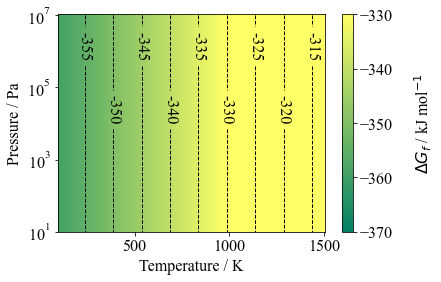

In [9]:
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-370,-330])

## 2Cu+Zn+Sn+2S2 <-> Cu2ZnSnS4


In [10]:
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../tests/regression/data/S2.dat",energies={"pbesol":-0.217220682510473e05},zpe_pbesol=0.04421415)
S2_reaction = reactions.Reaction({Cu:2,Zn:1,Sn:1,S2:2},{CZTS:1},temperature=T,pressure=P)

In [11]:
GFE = S2_reaction.Dmu(units="kJ")

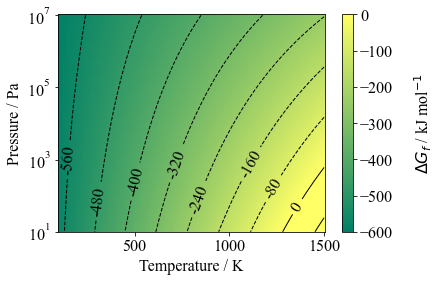

In [12]:
GFE.plot_TvsP(scale_range=[-600,0])